In [59]:
pip install Hough-TMF --upgrade

  Obtaining dependency information for Hough-TMF from https://files.pythonhosted.org/packages/e1/11/b751e537b491d0f8fa037ff76a1843cba3ce752fe7bcdafa2e93572c3d10/Hough_TMF-0.2.4-py3-none-any.whl.metadata
  Attempting uninstall: Hough-TMF
    Found existing installation: Hough-TMF 0.2.3
    Uninstalling Hough-TMF-0.2.3:
      Successfully uninstalled Hough-TMF-0.2.3
Note: you may need to restart the kernel to use updated packages.


# TMA

In [26]:
import numpy as np
data_17 = np.load('test_data/das_0017.npy')
data_22 = np.load('test_data/das_0022.npy')

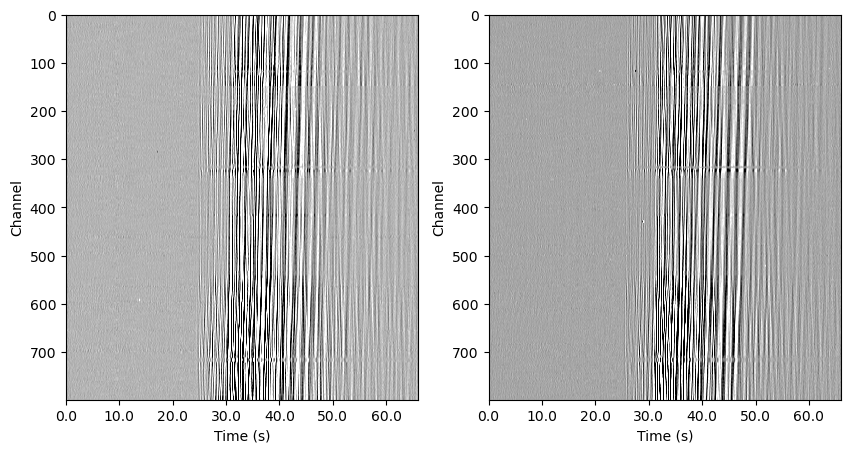

In [31]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(data_22.T[:,1200:-1200], cmap='gray', aspect='auto',clim = (-100,100))
plt.xticks(np.arange(0,7000,1000),np.arange(0,7000,1000)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')


plt.subplot(122)
plt.imshow(data_17.T[:,1200:-1200], cmap='gray', aspect='auto',clim = (-100,100))
plt.xticks(np.arange(0,7000,1000),np.arange(0,7000,1000)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.show()

Text(0, 0.5, 'Channel')

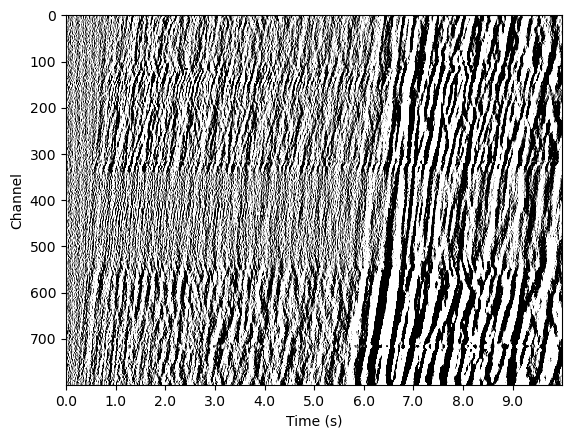

In [34]:
tmp = data_17.T[:,1200+2500:4700]   
plt.imshow(tmp, cmap='gray', aspect='auto',clim = (-100,100))
plt.xticks(np.arange(0,1000,100),np.arange(0,1000,100)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')

In [38]:
data = data_22.T.copy()
# calculate the cross-correlation between the template and the image
corr = tmf.tma(data,tmp, step=1,device='cpu',moves=[],is_sum=False,batch_size=-1,half=False,save_memory=False)

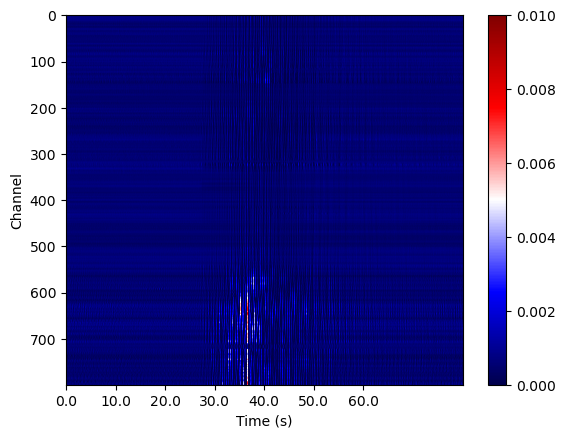

In [45]:
from matplotlib import pyplot as plt
plt.imshow(corr[0], cmap='seismic', aspect='auto',clim = (0,0.01))
plt.colorbar()
plt.xticks(np.arange(0,7000,1000),np.arange(0,7000,1000)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.show()

# Hough Transform

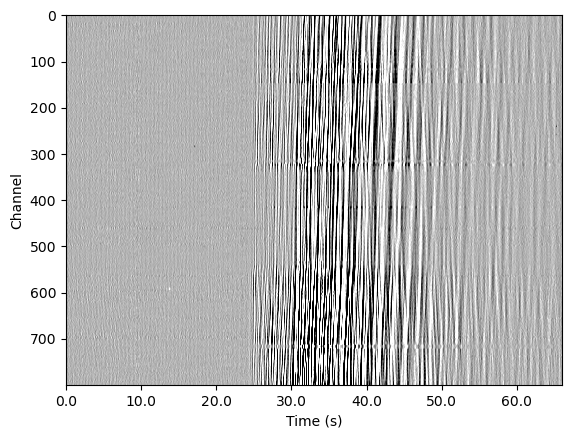

In [24]:

plt.imshow(data_22.T[:,1200:-1200], cmap='gray', aspect='auto',clim = (-100,100))
plt.xticks(np.arange(0,7000,1000),np.arange(0,7000,1000)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.show()

In [17]:
from hd_tma import hough
lines = hough(data_22.T[:,1200:-1200],freq=100,bandpass=[2,8],sl=[.1,1],resample=1, sigma=1.4, low_threshold=3, high_threshold=6,theta=np.linspace(np.pi/2/90*10/100,np.pi/2/90*10,99), fil='bandpass', S_L=True,beta=0,kernel=(3,3))

Text(0, 0.5, 'Channel')

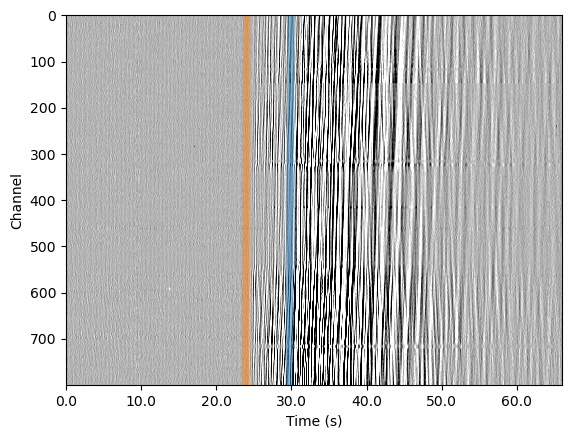

In [25]:
plt.imshow(data_22.T[:,1200:-1200], cmap='gray', aspect='auto',clim = (-100,100))
for line in lines:
    plt.plot(line,np.arange(data_22.T.shape[0]),linewidth=5,alpha=.5)
plt.xticks(np.arange(0,7000,1000),np.arange(0,7000,1000)*0.01)
plt.xlabel('Time (s)')
plt.ylabel('Channel')

In [6]:
# 打包
!python setup.py sdist bdist_wheel

running sdist

c:\Users\DELL\.conda\envs\apm1\Lib\site-packages\setuptools\dist.py:745: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'desciption-file' will not be supported in future
        versions. Please use the underscore name 'desciption_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
c:\Users\DELL\.conda\envs\apm1\Lib\site-packages\setuptools\_distutils\cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
 


running egg_info
writing Hough_TMF.egg-info\PKG-INFO
writing dependency_links to Hough_TMF.egg-info\dependency_links.txt
writing top-level names to Hough_TMF.egg-info\top_level.txt
reading manifest file 'Hough_TMF.egg-info\SOURCES.txt'
adding license file 'LICENCE'
writing manifest file 'Hough_TMF.egg-info\SOURCES.txt'
running check
creating Hough-TMF-0.2.4
creating Hough-TMF-0.2.4\Hough_TMF.egg-info
creating Hough-TMF-0.2.4\hd_tma
copying files to Hough-TMF-0.2.4...
copying LICENCE -> Hough-TMF-0.2.4
copying README.md -> Hough-TMF-0.2.4
copying setup.cfg -> Hough-TMF-0.2.4
copying setup.py -> Hough-TMF-0.2.4
copying Hough_TMF.egg-info\PKG-INFO -> Hough-TMF-0.2.4\Hough_TMF.egg-info
copying Hough_TMF.egg-info\SOURCES.txt -> Hough-TMF-0.2.4\Hough_TMF.egg-info
copying Hough_TMF.egg-info\dependency_links.txt -> Hough-TMF-0.2.4\Hough_TMF.egg-info
copying Hough_TMF.egg-info\top_level.txt -> Hough-TMF-0.2.4\Hough_TMF.egg-info
copying hd_tma\__init__.py -> Hough-TMF-0.2.4\hd_tma
copying hd_tm

In [49]:
!twine upload dist/*

ERROR    InvalidDistribution: Cannot find file (or expand pattern): 'dist/*'   
